## 🕹️ 머신러닝 기초학습
---
#### 다음 내용은 '혼자 공부하는 머신러닝'에 대한 내용입니다.
&nbsp;
##### [프로그램 분석]
    - 합성곱의 처리 과정을 이해합니다.

In [130]:
# 먼저 케라스를 불러옵시다.
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

In [131]:
# 훈련모델을 불러오고, 검증 데이터도 나누어줍시다.
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,
                                                                    train_target,
                                                                    test_size=0.2,
                                                                    random_state=42)

In [135]:
# 이전 시간에 만들었던 모델을 그대로 만들어볼게요.
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28 ,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [136]:
# 모델을 컴파일 해주죠.
model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [137]:
# 모델을 훈련시켜볼게요.
earlystopping = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled,
                    train_target,
                    validation_data=(val_scaled, val_target),
                    epochs=20,
                    callbacks=[earlystopping])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7470 - loss: 0.7043 - val_accuracy: 0.8824 - val_loss: 0.3166
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8729 - loss: 0.3508 - val_accuracy: 0.8928 - val_loss: 0.2807
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8936 - loss: 0.2948 - val_accuracy: 0.9009 - val_loss: 0.2601
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9049 - loss: 0.2620 - val_accuracy: 0.9135 - val_loss: 0.2358
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9149 - loss: 0.2345 - val_accuracy: 0.9124 - val_loss: 0.2341
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9195 - loss: 0.2124 - val_accuracy: 0.9193 - val_loss: 0.2201
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9276 - loss: 0.1953 - val_accuracy: 0.9172 - val_loss: 0.2265
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9316 - los

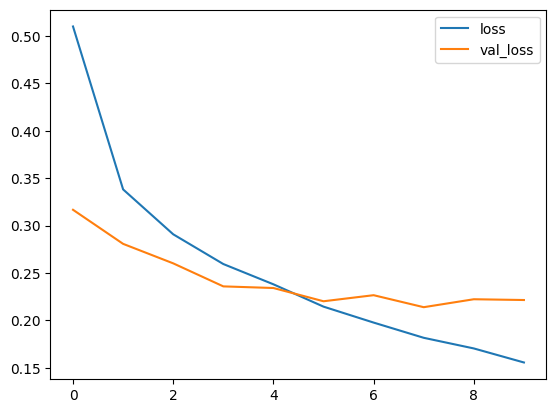

In [138]:
# 손실그래프는 아래와 같습니다.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [139]:
# 검증데이터 점수도 나쁘지 않네요.
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9235 - loss: 0.2096


[0.2138623297214508, 0.921833336353302]

In [140]:
# 모델에서 사용되는 각각의 층들의 모습을 볼 수 있습니다.
model.layers

[<Conv2D name=conv2d_12, built=True>,
 <MaxPooling2D name=max_pooling2d_10, built=True>,
 <Conv2D name=conv2d_13, built=True>,
 <MaxPooling2D name=max_pooling2d_11, built=True>,
 <Flatten name=flatten_5, built=True>,
 <Dense name=dense_19, built=True>,
 <Dropout name=dropout_4, built=True>,
 <Dense name=dense_20, built=True>]

In [141]:
# weights의 0은 가중치를 나타내고,
model.layers[0].weights[0].shape

TensorShape([3, 3, 1, 32])

In [142]:
# weights의 1은 절편의 값을 나타냅니다.
model.layers[0].weights[1].shape

TensorShape([32])

In [144]:
# 이렇게 사용된 가중치의 값을 알기 위해서 numpy()로 바꾸어줄게요.
# 이렇게 가중치에 대한 평균과 표준편차를 구하면 평균값은 0에 가깝고 표준편자는 2.7정도입니다.
import numpy as np
conv_weights = model.layers[0].weights[0].numpy()
print(np.mean(conv_weights), np.std(conv_weights))

-0.044930045 0.2749312


(array([ 2.,  2.,  3.,  3.,  4., 10., 55., 88., 87., 34.]),
 array([-1.45650673, -1.27009189, -1.08367705, -0.89726233, -0.7108475 ,
        -0.52443266, -0.33801794, -0.1516031 ,  0.03481174,  0.22122657,
         0.40764141]),
 <BarContainer object of 10 artists>)

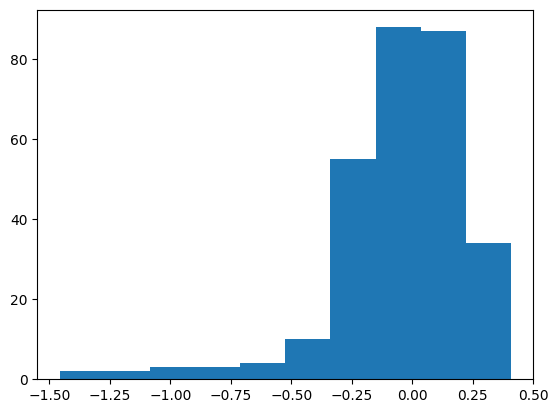

In [147]:
# 더 이해하기 쉽게 히스토그램으로 그려볼게요.
plt.hist(conv_weights.reshape(-1,))

# 값이 0을 중심으로 종모양을 띠고 있는 것을 알 수 있습니다.
# 이 가중치가 무엇인가 의미를 학습한 것일까요?

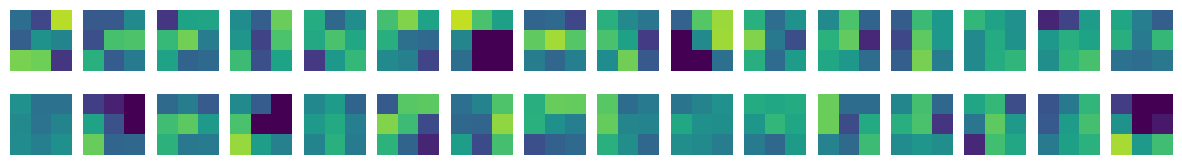

In [149]:
# conv_weights에 32개의 가중치를 저장했습니다. (필터가 32개이기 때문)
# 아래 그림은 일정한 특징을 띄는데, 가장 첫번째 그림에서 아래 2개의 픽셀의 값이 높습니다. (밝으면 밝을수록 값이 높아짐)
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i][j].imshow(conv_weights[:, :, 0, i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

In [150]:
# 이번에는 훈련을 시키지 않은 빈 합성곱 신경망을 만들어보죠.
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28, 28, 1)))

In [151]:
# 이 모델의 가중치의 크기 역시 앞에서의 모델과 같습니다.
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [153]:
# 먼저 이 가중치의 평균과 표준편차를 살펴보면
# 평균은 0에 가깝지만, 표준편차는 이전에 비해서 괭장히 작은 값을 가집니다.
no_training_weights = no_training_conv.weights[0].numpy()
no_training_weights.mean(), no_training_weights.std()

(np.float32(-0.00245645), np.float32(0.08163669))

(array([29., 31., 34., 25., 27., 23., 37., 28., 27., 27.]),
 array([-0.14189698, -0.11362179, -0.08534659, -0.0570714 , -0.02879621,
        -0.00052102,  0.02775417,  0.05602936,  0.08430456,  0.11257975,
         0.14085494]),
 <BarContainer object of 10 artists>)

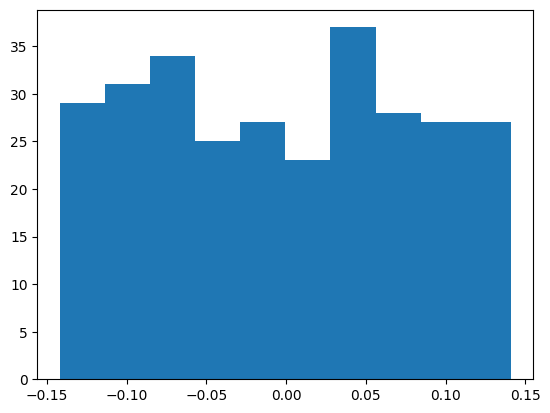

In [154]:
# 히스토 그램으로 그려보죠.
plt.hist(no_training_weights.reshape(-1,))

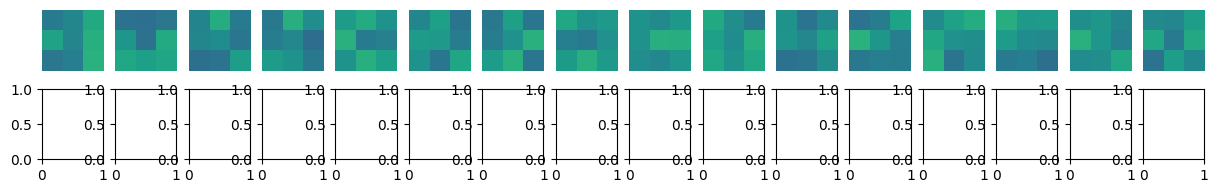

In [156]:
# 위에서와 동일한 그림을 한번 그려볼게요.
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:, :, 0, i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
    plt.show()
# 가중치의 큰 특색이 보이지 않습니다.

In [159]:
# model.inputs을 이용해서 간단한 입력을 참조할 수 있습니다.
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=keras_tensor_127>]


In [160]:
# 입력층과 첫번째 층을 연결하는 새로운 모델로 만들어봅시다.
conv_acti = keras.Model(model.inputs, model.layers[0].output)

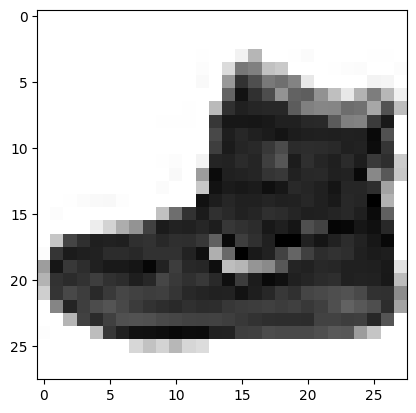

In [161]:
# 첫번째 신발 그림을 가져와보죠.
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')

In [164]:
# 훈련을 시키려면 (1, 28, 28, 1)을 만족해야하고, 전처리 시켜줄게요.
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
# feature_maps은 특성맵으로 결과값입니다.
feature_maps = conv_acti.predict(inputs)
# 특성층을 거친 후에 모습은 (1, 28, 28, 32)죠?
print(feature_maps.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
(1, 28, 28, 32)


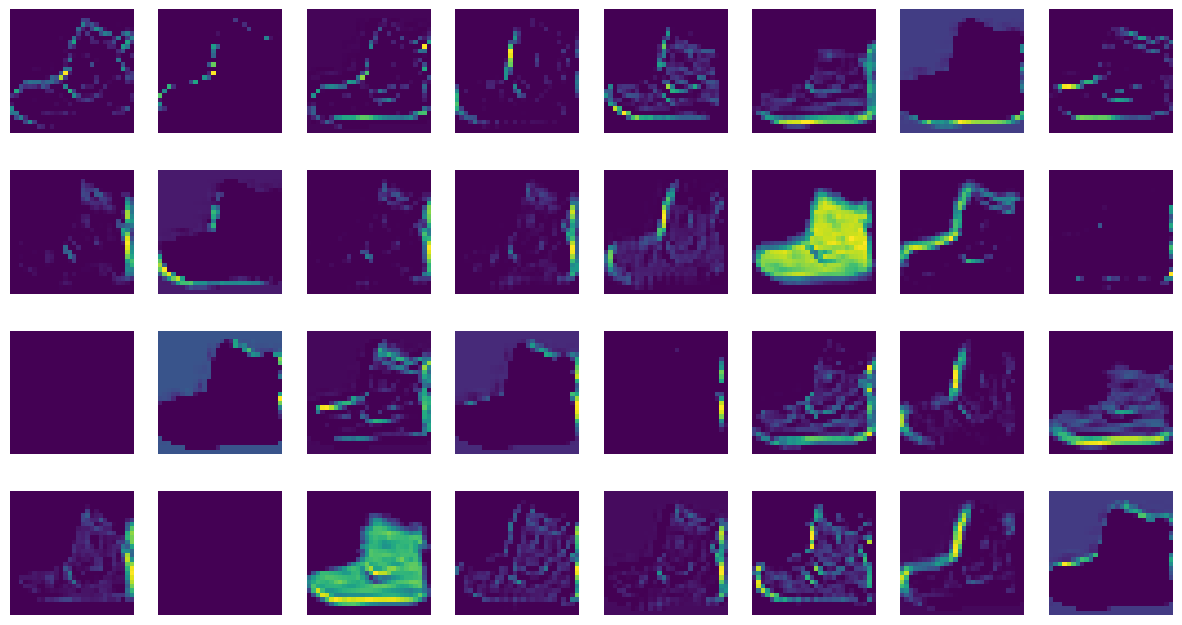

In [169]:
# 특성 맵을 그려보겠습니다. 32개의 데이터이므로 8*4의 형태로 그릴게요.
fig, axes = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
    for j in range(8):
        axes[i, j].imshow(feature_maps[0, :, :, i*8+j])
        axes[i, j].axis('off')

# 이 특성 맵은 32개의 필터로 인해 입력 이미지에서 강하게 활성화된 부분을 보여줍니다.

In [170]:
# 이번에는 두번째 합성곱층을 볼까요?
con2d_acti = keras.Model(model.inputs, model.layers[2].output)

In [173]:
# 첫번째 신발을 또 불러옵시다.
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = con2d_acti.predict(inputs)
# 모양이 달라졌죠? 풀링층을 거쳤으니 기존에 28*28의 특성이 14*14로 바뀌는거죠.
print(feature_maps.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
(1, 14, 14, 64)


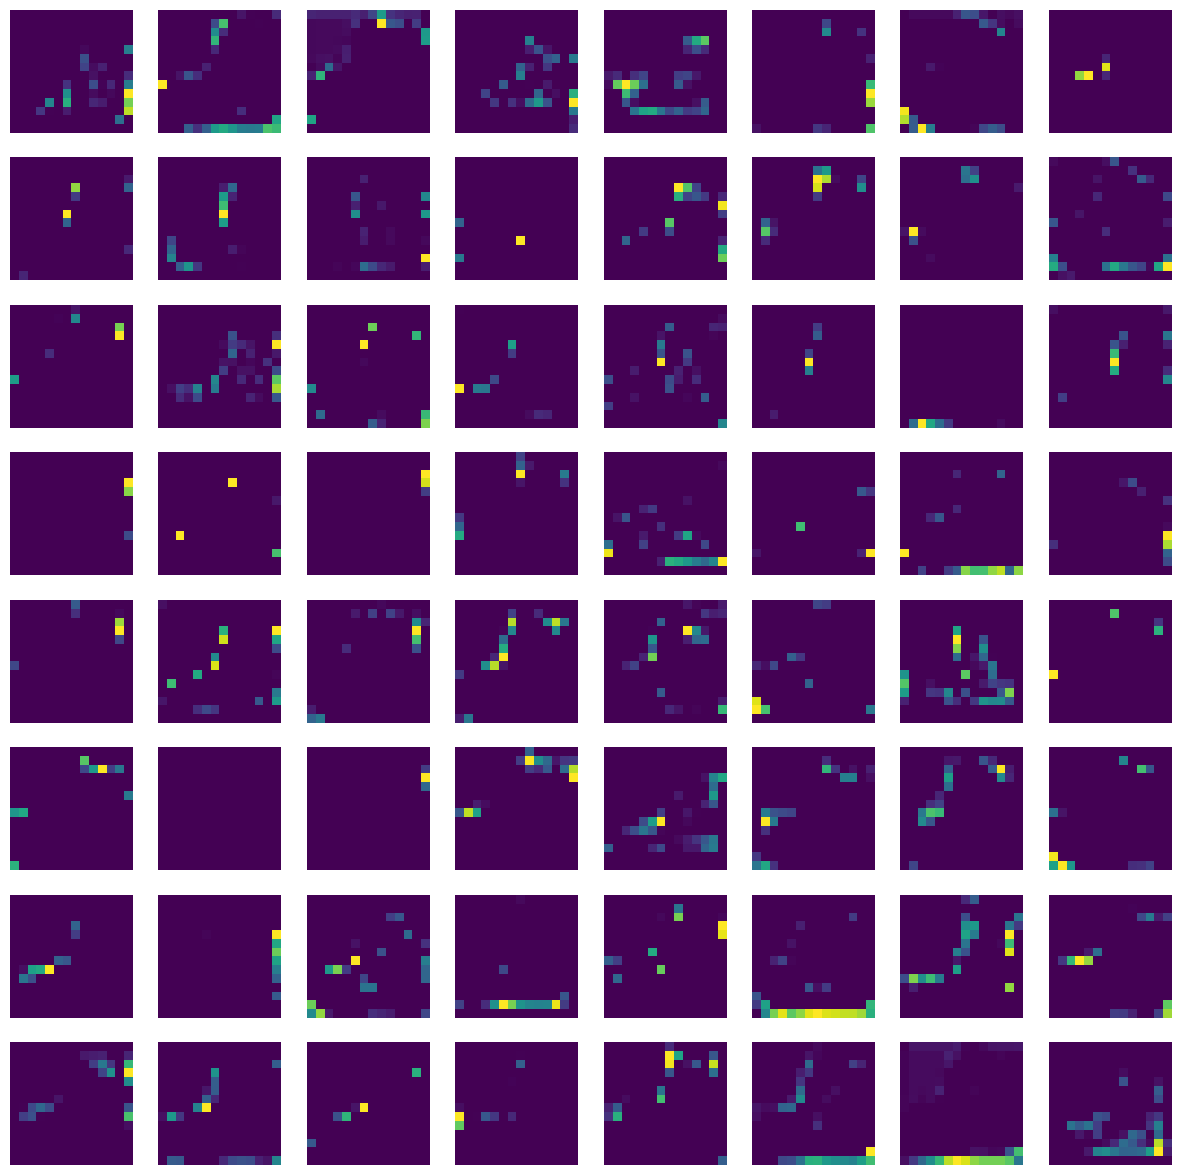

In [175]:
# 이번에는 8*8의 그림으로 그려볼게요.
fig, axes = plt.subplots(8, 8, figsize=(15, 15))
for i in range(8):
    for j in range(8):
        axes[i, j].imshow(feature_maps[0, :, :, i*8+j])
        axes[i, j].axis('off')

# 합성곱 신경망의 앞부분에 있는 합성곱 층은 이미지의 시각적인 정보를 감지하고, 
# 뒤쪽에 있는 합성곱 층은 앞쪽에서 감지한 시각적 정보를 바탕으로 추상적인 정보를 학습한다고 볼 수 있습니다.

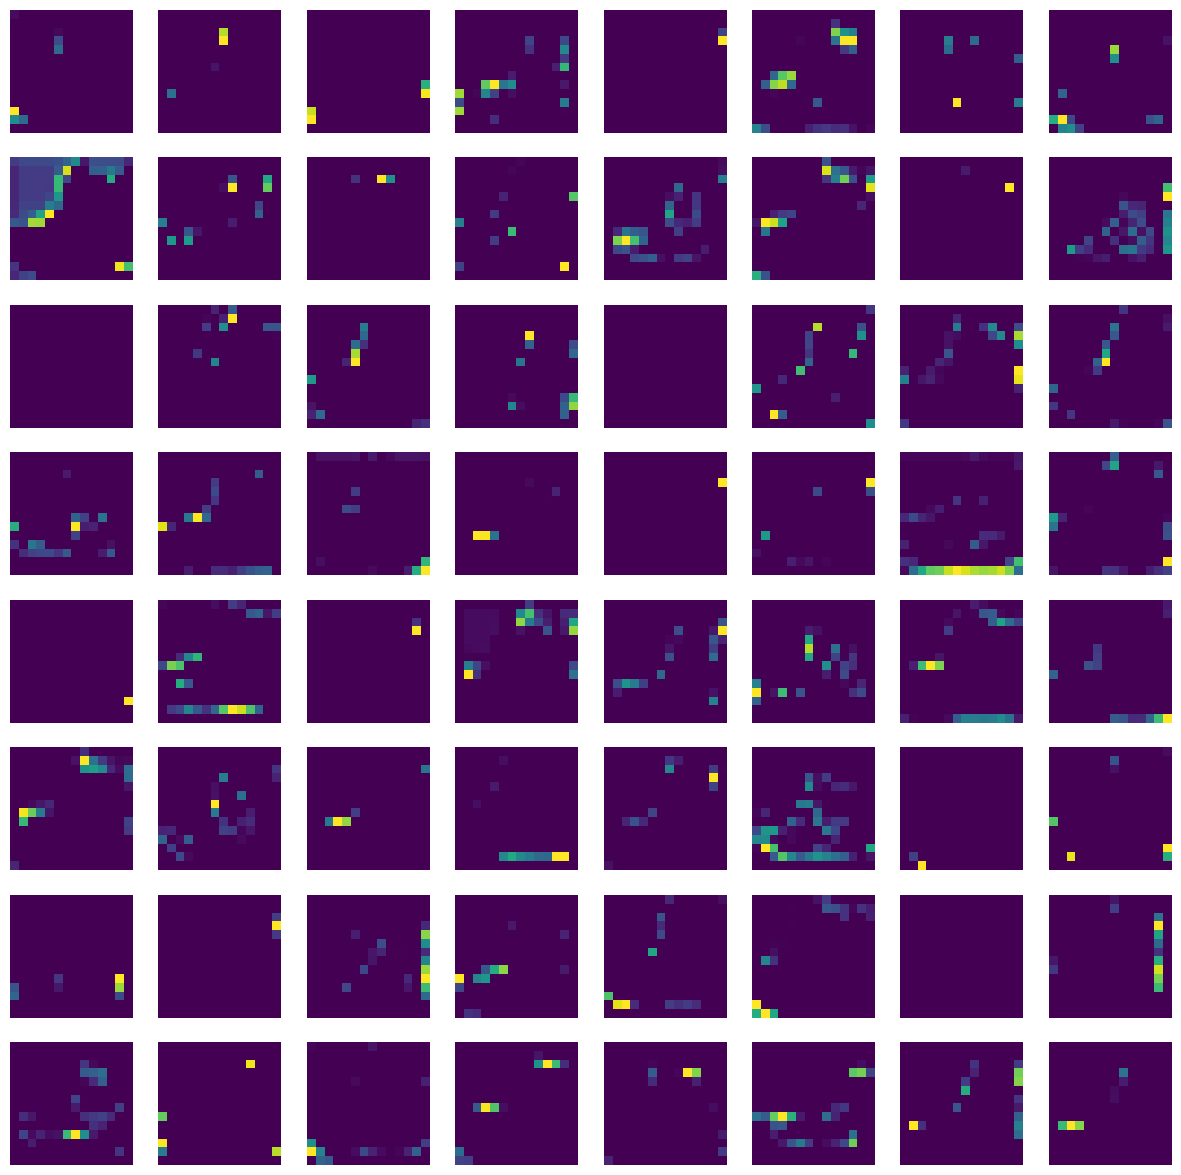